In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
from sklearn.datasets import load_breast_cancer

In [38]:
cancer = load_breast_cancer()

In [42]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [43]:
df_feats = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [37]:
df_feats.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

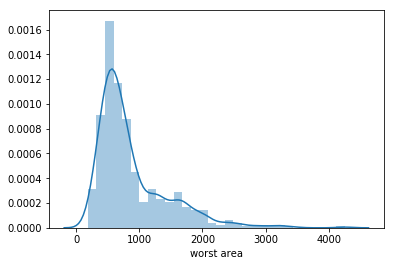

In [50]:
sns.distplot(df_feats['worst area'])

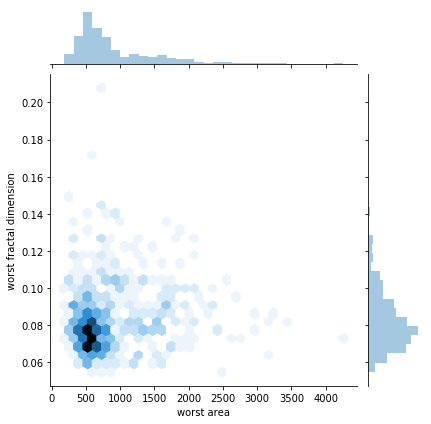

In [52]:
sns.jointplot(x='worst area',y='worst fractal dimension',data=df_feats,kind='hex')

In [13]:
from sklearn.cross_validation import train_test_split


In [18]:
X = df_feats
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 101)

In [19]:
from sklearn.svm import SVC

In [20]:
model = SVC()

In [21]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
predictions = model.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[  0  66]
 [  0 105]]


             precision    recall  f1-score   support

          0       0.00      0.00      0.00        66
          1       0.61      1.00      0.76       105

avg / total       0.38      0.61      0.47       171



D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
from sklearn.grid_search import GridSearchCV

In [26]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [27]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [28]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.636364 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.636364 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................... C=1, gamma=1, score=0.631579 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.636364 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.631579 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.631579 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.636364 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.631579 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.631579 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [29]:
grid.best_params_

{'C': 10, 'gamma': 0.0001}

In [30]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
grid_pred = grid.predict(X_test)

In [32]:
print(confusion_matrix(y_test,grid_pred))
print('\n')
print(classification_report(y_test,grid_pred))

[[ 60   6]
 [  3 102]]


             precision    recall  f1-score   support

          0       0.95      0.91      0.93        66
          1       0.94      0.97      0.96       105

avg / total       0.95      0.95      0.95       171

